# AI Health Chatbot Project

## Exploratory Data Analysis (EDA)

**Dataset:** Disease Prediction Using Symptoms

This notebook performs detailed EDA, preprocessing, and feature analysis for an AI-based health chatbot project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

## Load Dataset

In [3]:
df = pd.read_csv('Training-eda.csv')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (4920, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


## Missing Values Check

In [5]:
df.isnull().sum().sum()

0

## Target Variable Distribution

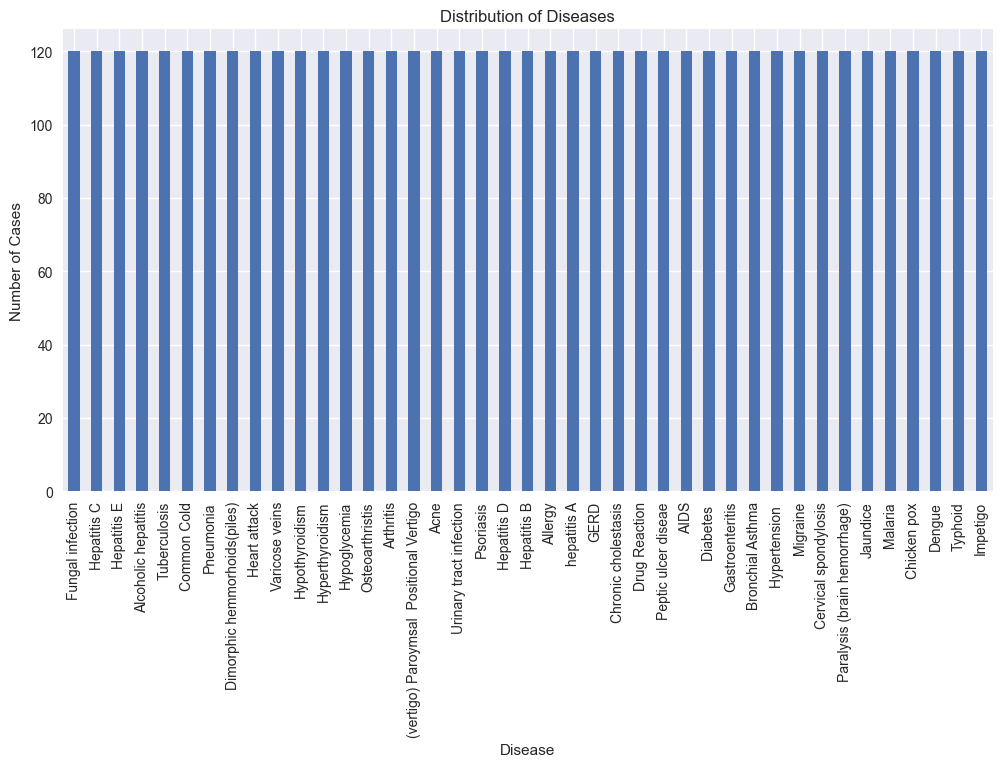

In [6]:
plt.figure(figsize=(12,6))
df['prognosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Number of Cases')
plt.show()

## Number of Symptoms per Patient

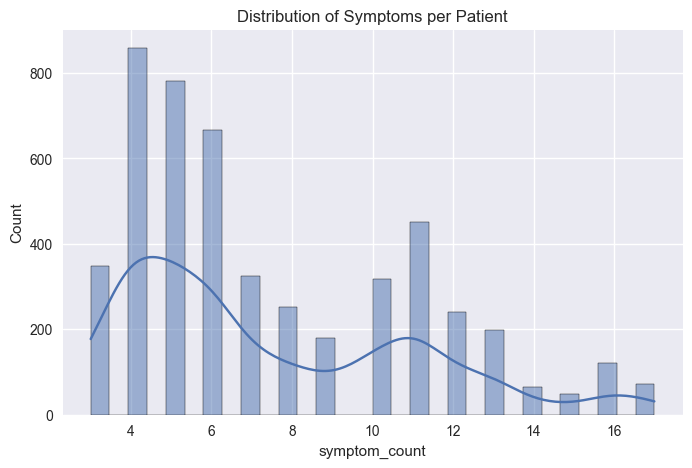

In [7]:
df['symptom_count'] = df.drop('prognosis', axis=1).sum(axis=1)
plt.figure(figsize=(8,5))
sns.histplot(df['symptom_count'], bins=30, kde=True)
plt.title('Distribution of Symptoms per Patient')
plt.show()

## Most Common Symptoms

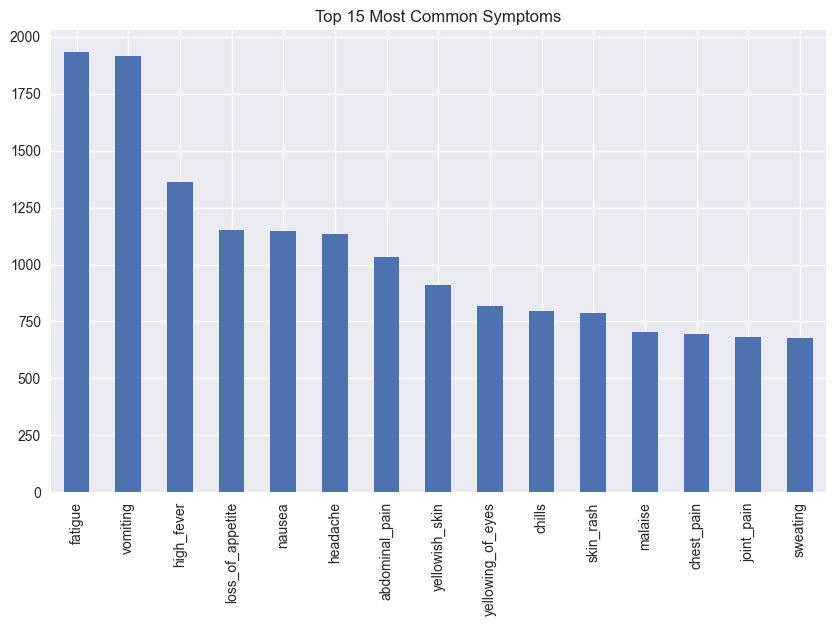

In [8]:
symptom_frequency = df.drop(['prognosis','symptom_count'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
symptom_frequency.head(15).plot(kind='bar')
plt.title('Top 15 Most Common Symptoms')
plt.show()

## Correlation Heatmap

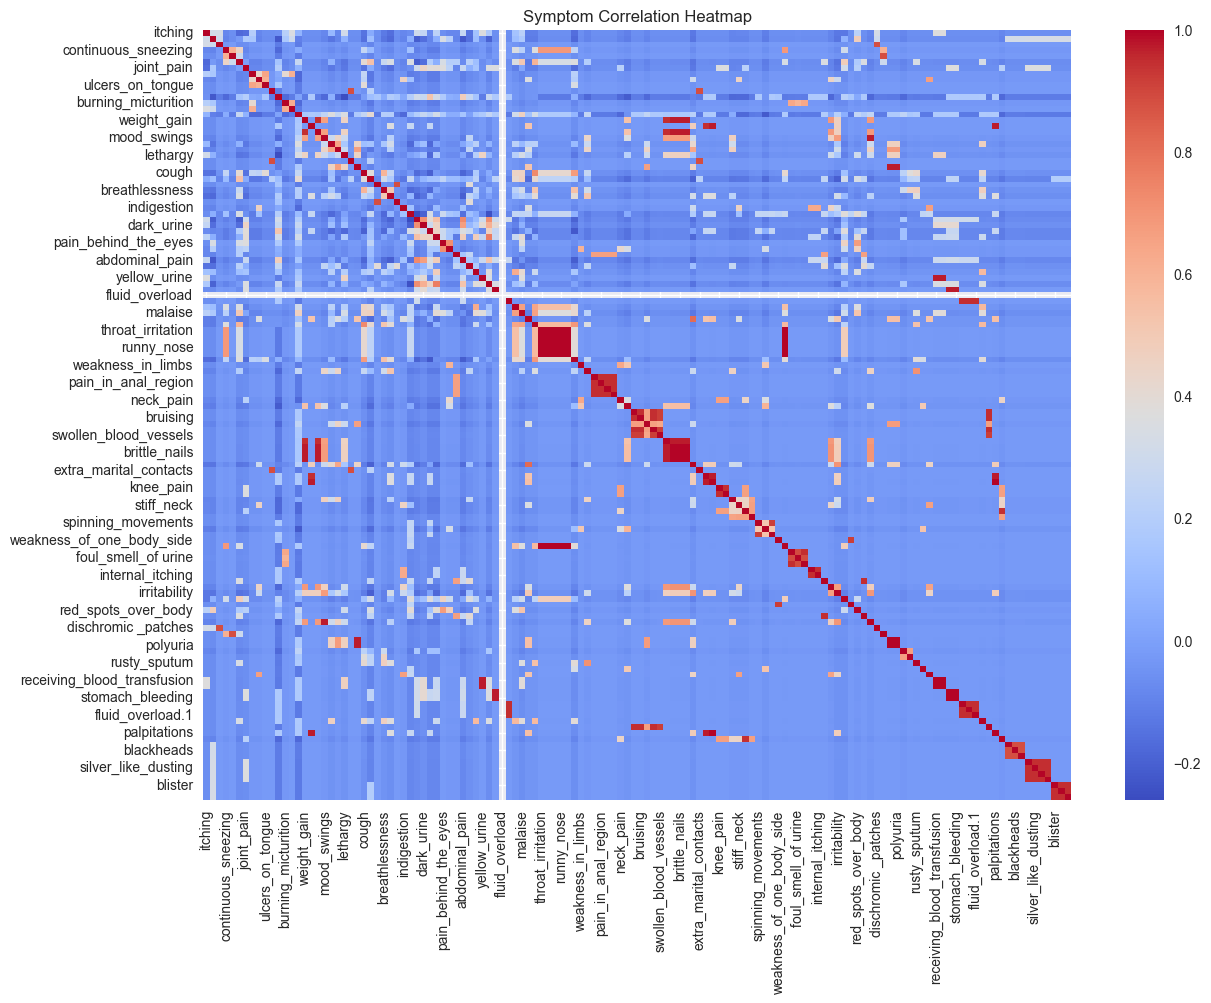

In [9]:
corr = df.drop(['prognosis','symptom_count'], axis=1).corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Symptom Correlation Heatmap')
plt.show()

## Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold
X = df.drop(['prognosis','symptom_count'], axis=1)
y = df['prognosis']
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]
len(selected_features)

131

## Encode Target Variable

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
len(le.classes_)

41

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

## EDA Summary
- Dataset handeled and missing values are dealt with
- Binary symptom-based features
- Balanced disease classes
- Feature selection applied
- Ready for ML models and Streamlit app